# Useful Snippets of Code

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import collections

import pandas as pd
%matplotlib inline

## Find NaN in EMA outcomes

once experiments are loaded

```python
from ema_workbench import load_results

results = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_2020-Jul-28-SOBOL.tar.gz')
experiments, outcomes = results

```
do:

In [ ]:
outcome_df = dict()
for k in outcomes.keys():
     outcome_df[k] = pd.DataFrame.from_dict(outcomes[k])
    

for k in outcomes.keys():
    print(outcome_df[k][outcome_df[k].isna().any(axis=1)])
    

## Logistic funtion to smoothen the thresholds of the LIHC

In [75]:
x=np.arange(0,1.0)
#y=np.array([52,133,203,230,237,239.5,239.8,239.9,240,240])
y=np.array([0.0,0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
L = 1
x=2
k=2

def logifunc(x,L,c,k):
    return L/ (1 + c*np.exp(-k*x))

popt, pcov = curve_fit(logifunc, x, y, p0=[20,1,1])
x_data = np.linspace(-2, 6, num=10)


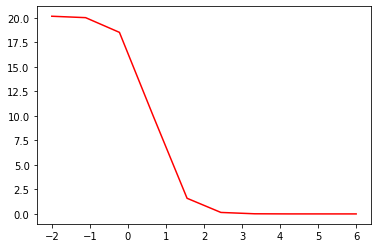

In [76]:
plt.plot(x_data, logifunc(x_data, *popt), 'r-',label='Threshold')


## Diff files 

In [12]:
# load both files into separate dataframes
file1 = pd.read_csv(r'C:/Users/angel/Downloads/Test_postgres_public_total_demand_halfhour.csv', sep=',', encoding='UTF-8')
file2 = pd.read_csv(r'C:/Users/angel/Downloads/20210621_gr4spdb_public_total_demand_halfhour.csv', sep=',', encoding='UTF-8')

# save the list of column names for each dataset
columnnames1 = list(file1)
columnnames2 = list(file2)

# check if the columns match
if collections.Counter(columnnames1) == collections.Counter(columnnames2):
    print ("Number of columns and Names match, Comparison possible...\n\n")
else:
    print ("Number of columns and Names are not matching!!! Please check the input!")
    sys.exit('Error!')

Number of columns and Names match, Comparison possible...




In [20]:
# column names for the comparison column
check_colnames= [s + '_c' for s in columnnames1]

# add suffixes to distinguish between actual and expected in the merger
file1 = file1.add_suffix('_e') # expected
file2 = file2.add_suffix('_t') # actual, true result

# merge them using the given key, use outer join
comparison = pd.merge(file1,file2, how='outer',
                      left_on=['Key_e'],
                      right_on=['Key_t'])

# create the columnwise comparison
for col in columnnames1:
    comparison[(col + '_c')] = comparison[(col + '_t')] == comparison[(col + '_e')]

# reorder the columns
comparison=comparison.reindex(sorted(comparison.columns),axis=1)

# save the result as Excel file
comparison.to_excel('result.xlsx')

SyntaxError: invalid syntax (<ipython-input-20-6a87aae15afb>, line 10)

In [10]:
print(file1[~file2.column1.isin(file1.columns)])


AttributeError: 'DataFrame' object has no attribute 'column1'

In [24]:
frames = (file1, file2)
result = pd.concat(frames, sort=False)

In [25]:
result

,settlement_date_e_e_e_e_e,total_demand_e_e_e_e_e,price_e_e_e_e_e,settlement_date_t_t_t_t_t,total_demand_t_t_t_t_t,price_t_t_t_t_t
0,1999-01-01 00:00:00.000000,3771.3,26.84,NaN,NaN,NaN
1,1999-01-01 00:30:00.000000,3633.3,30.52,NaN,NaN,NaN
2,1999-01-01 01:00:00.000000,3464.5,28.74,NaN,NaN,NaN
3,1999-01-01 01:30:00.000000,3685.6,27.94,NaN,NaN,NaN
4,1999-01-01 02:00:00.000000,3515.8,20.90,NaN,NaN,NaN
5,1999-01-01 02:30:00.000000,3328.5,20.26,NaN,NaN,NaN
6,1999-01-01 03:00:00.000000,3133.9,15.49,NaN,NaN,NaN
7,1999-01-01 03:30:00.000000,3003.8,14.35,NaN,NaN,NaN
8,1999-01-01 04:00:00.000000,2890.3,14.08,NaN,NaN,NaN
9,1999-01-01 04:30:00.000000,2796.0,13.97,NaN,NaN,NaN
